## Test per progetto AI

E' necessario scaricare i file roads.json e nodes.json

In [66]:
import json
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#%matplotlib inline

In [51]:
nodes = json.load(open('nodes.json', 'r'))
roads = json.load(open('roads.json', 'r'))

In [37]:
roads[1] #roads are indicized as 0,1,2...

{'p1': '1695859083',
 'p2': '1376589543',
 'discriminator': '3006329516',
 'directed': False,
 'sidewalks': [False, False],
 'distance': 839.7041050407402}

In [38]:
roads[1]['p1']

'1695859083'

In [55]:
nodes[0]

{'id': '1376589543', 'coordinates': [12.5308204, 45.4681674]}

Create two maps as lookup tables for the nodes

In [53]:
#create a lookup table for point coordinates
node_coords = {point['id']:tuple(point['coordinates']) for point in nodes} #dictonary initialization with comprehension
coords_node = {tuple(point['coordinates']):point['id'] for point in nodes} #tuples are hashable-> can be key to a dictionary

In [61]:
print(node_coords[roads[11]['p1']]) #retrieve coordinates from node ID

(12.6728663, 45.571353)


A questo punto bisogna generare le query degli utenti:

semplificazione: l'orario non influisce sui tempi di percorrenza -> dipendono solo dalla distanza

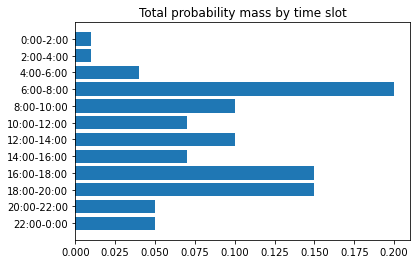

In [22]:
#time probability mass: how many requests per 2-hour slot in percentage
time_prob = {6 : 0.2,
                 8 : 0.1,
                 10 : 0.07,
                 12 : 0.1,
                 14 : 0.07,
                 16 : 0.15,
                 18 : 0.15,
                 20 : 0.05,
                 22 : 0.05,
                 0 : 0.01,
                 2 : 0.01,
                 4 : 0.04 }

#for plotting
names = []
values = []
for i in range(0, 24, 2):
    names.append("{}:00-{}:00".format(i, (i+2)%24))
    values.append(time_prob[i])

names.reverse()
values.reverse()

plt.title("Total probability mass by time slot")
plt.barh(range(12), values, tick_label=names)
plt.show()

Consider each trip as starting or ending in one of the nodes: the function below serves to approximate the closest node on the map

In [91]:
def find_closest_node(long, lat) :
    best_dist = math.inf
    best_id = -1
    
    #truncate at 7 decimals
    long = int(long*10e7)/10e7
    lat = int(lat*10e7)/10e7
    
    for node in coords_node :
        dist = math.sqrt((long-node[0])**2 + (lat-node[1])**2)
        if dist < best_dist:
            best_id = coords_node[node]
            best_dist = dist
    
    return best_id

In [92]:
id = find_closest_node(12.3962225537085, 45.538878713223) #format (long,lat) Altino
print(node_coords[id])

(12.3984001, 45.5367487)


Nota: i punti non sono molto densi

In [21]:
#to model commuters, we split the map into "residential zones" and "work zones"


Regular transfer (not related to pendolarism) is modeled as a gaussian random variable with respect to location ($\mu = 15km, \sigma = 10km$)  